In [1]:
import numpy as np
np.seterr(all='ignore')
from networks import simple_network
from utils import *
simple_hyperparameters = {'N_train' : 1000, #size of training dataset 
                          'N_test' : 100, #size of test set x
                          'lr' : 0.001, #SGD learning rate 
                          'epochs' : 10, #training epochs
                          'batch_size' : 10,  #batch size (large will probably fail)           
                          'context_location' : 'start',  #where the feed in the task context 'start' vs 'end'
                          'train_mode' : 'random', #training mode 'random' vs 'replay' 
                          'second_task' : 'prod', #first task adds x+y, second task 'prod' = xy or 'add1.5' = x+1.5y
                          'fraction' : 0.50, #fraction of training data for tasks 1 vs task 2
                          'hidden_size' : 0} #hidden layer width

simple_model = simple_network(simple_hyperparameters)

/nfs/nhome/live/lhollingsworth/miniconda3/envs/ModNet/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Model: 100%|██████████| 100/100 [03:28<00:00,  2.08s/it]


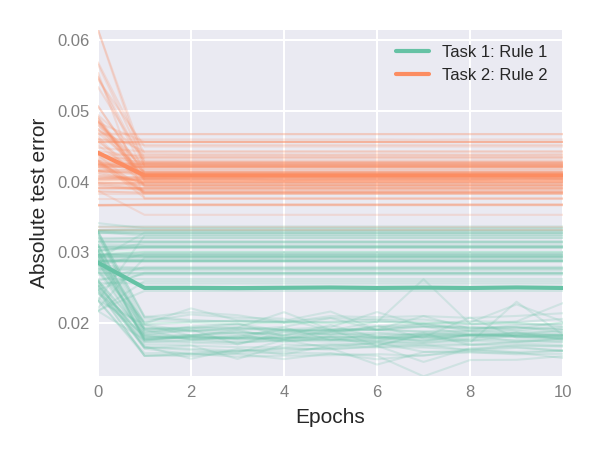

In [2]:
N_models = 100
models1 = train_multiple('simple_network', simple_hyperparameters, N_models = N_models)
plot_training(models1)